# Taller semana 8: Consolidacion
# Anibal Muñoz
# 21.087.122-5
# Diego Vergara
# 19.940.239-0
# Cristobal Galaz
# 20.359.833-5

In [23]:
#ip install pandas 
#pip install numpy
#pip install seaborn
#pip install kagglehub
#pip install -U scikit-learn

In [1]:
#------Manejo de datos------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Se carga el dataset "Airline Passenger Satisfaction" desde Kaggle
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

# El dataset elegido consta de 2 archivos .csv los cuales ya estan divididos en datos de entrenamiento y datos de prueba, entre los 2 dataset hay mas de 125.000 datos, donde se dividieron en 20%, constando el dataset de entrenamiento de 100.000 datos y el de prueba consta de 25.000 datos aproximadamente

In [4]:
import kagglehub

# Descargar el dataset
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

# Lista para almacenar los datasets
datasets = []

# Leer todos los CSVs
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(filepath)
            datasets.append((filename, df))
            print(f"Successfully loaded: {filename}")
        except pd.errors.ParserError:
            print(f"Error reading {filename} as CSV. Trying the next file.")
        except Exception as e:
            print(f"An error occurred with {filename}: {e}")

# Acceder a los datasets por separado
#for name, df in datasets:
#    print(f"\nPreview of {name}:")
#    print(df.head())


Path to dataset files: C:\Users\Alumno\.cache\kagglehub\datasets\teejmahal20\airline-passenger-satisfaction\versions\1
Successfully loaded: test.csv
Successfully loaded: train.csv


# Se rescatan los 2 datasets por separado

In [7]:
data_train = datasets[0][1]
data_test = datasets[1][1]

# La forma de los datos de prueba

In [9]:
data_test.shape

(103904, 25)

# La forma de los datos de entrenamiento

In [11]:
data_train.shape

(25976, 25)

# Se procedera a hacer un analisis exploratorio de los datos, como el dataset de entrenamiento posee mas datos, sera el utilizado para el analisis

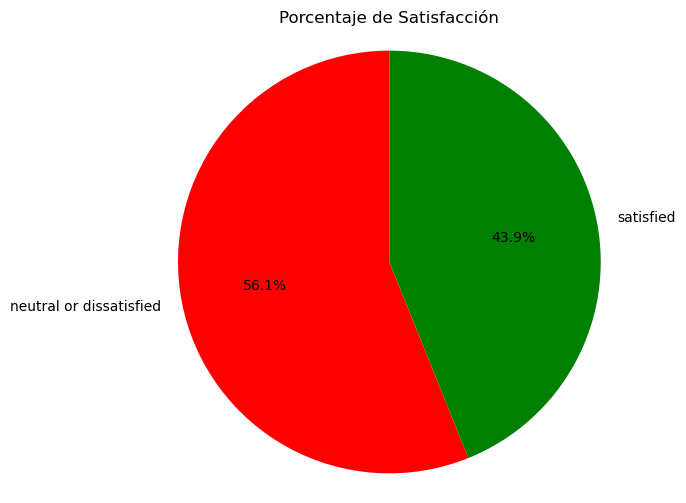

In [17]:
satisfied_counts = data_train['satisfaction'].value_counts()

# Gráfico de pastel
colors = ['red', 'green']
plt.figure(figsize=(6, 6))
plt.pie(satisfied_counts, labels=satisfied_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Porcentaje de Satisfacción')
plt.axis('equal')
plt.show()


### La mayoria de los clientes de la aerolinea se encuentran disconformes con el servicio

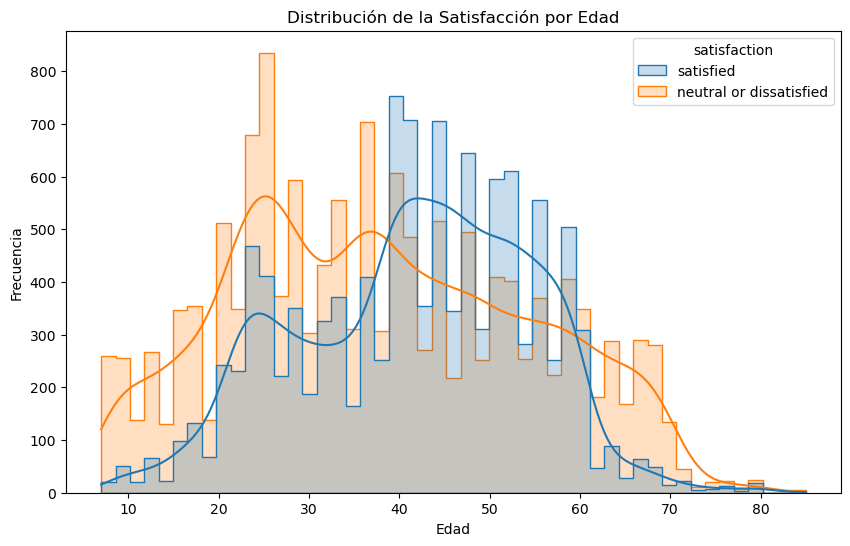

In [20]:
# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Age', hue='satisfaction', kde=True, element="step")
plt.title('Distribución de la Satisfacción por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


### Se logra apreciar que la gente mas joven se encuentra mas inconforme que la gente de edad laboral, cuando se entra a edad de jubulacion, vuelve la inconformidad a sobreponerse

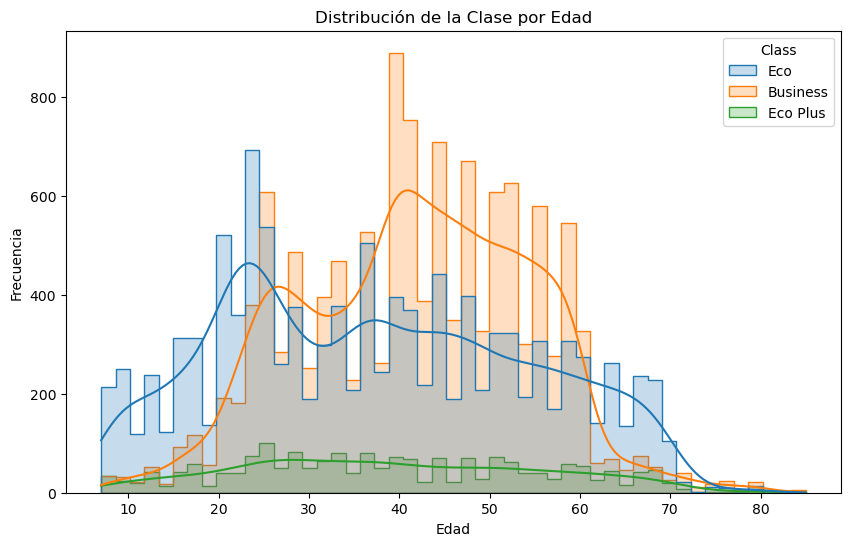

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Age', hue='Class', kde=True, element="step")
plt.title('Distribución de la Clase por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


### Se logra ver en la tabla de edad vs clase que en el mismo rango de satisfaccion contra edad es donde se encuentra el grueso de los usuarios de clase negocios, siendo esa la clase con mas beneficios, demostrando porque siempre estan mas conformes

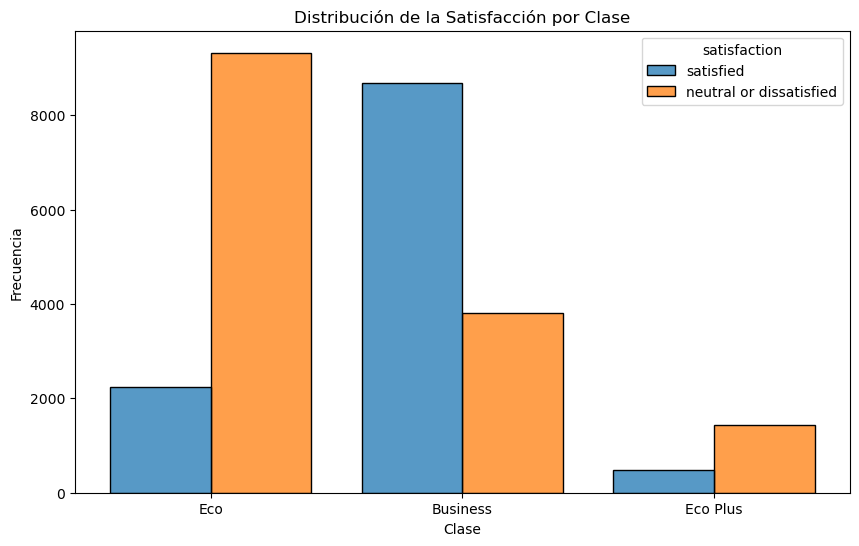

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Class', hue='satisfaction', multiple="dodge", shrink=.8)
plt.title('Distribución de la Satisfacción por Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


### Comparando la clase con la satisfaccion se logra ver que la clase de negocios es la unica clase en la que la conformidad supera a la inconformidad, validando la hipotesis antes planteada, los usuarios mas conformes son los que vuelan en clase negocio

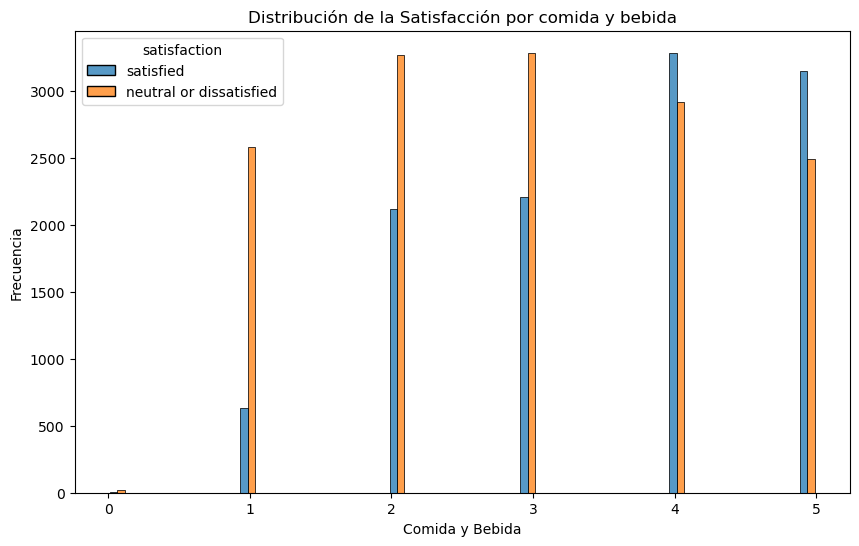

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Food and drink', hue='satisfaction', multiple="dodge", shrink=.8)
plt.title('Distribución de la Satisfacción por comida y bebida')
plt.xlabel('Comida y Bebida')
plt.ylabel('Frecuencia')
plt.show()


### El grafico muestra la conformidad contra la calidad de la comida, se puede apreciar que la brecha que existe entre la confomidad y la calidad de la comida se va cerrando mientras la comida sube de calidad, esta superando la brecha hasta que los usuarios estan mas conformes que inconformes al momento que la comida posee 4 estrellas

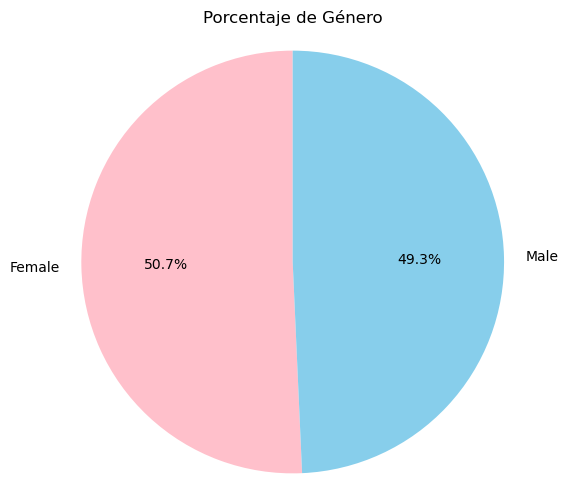

In [32]:
gender_counts = data_train['Gender'].value_counts()
colors = ['pink', 'skyblue']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Porcentaje de Género')
plt.axis('equal')
plt.show()


### Se comprueba que la distribucion de usuarios hombres y mujeres son de 50 50 aproximadamente

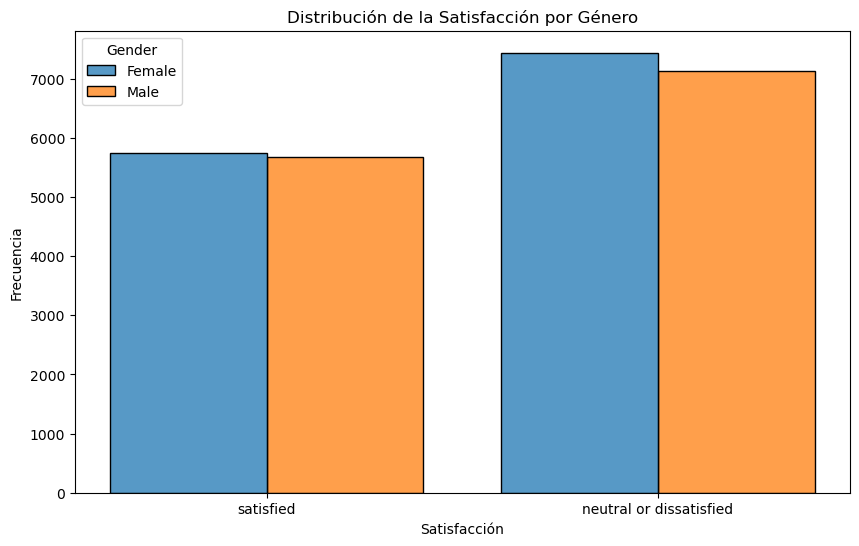

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='satisfaction', hue='Gender', multiple="dodge", shrink=.8)
plt.title('Distribución de la Satisfacción por Género')
plt.xlabel('Satisfacción')
plt.ylabel('Frecuencia')
plt.show()


### Se comprueba que la satisfaccion no se tiene mucha relacion con el genero del usuario

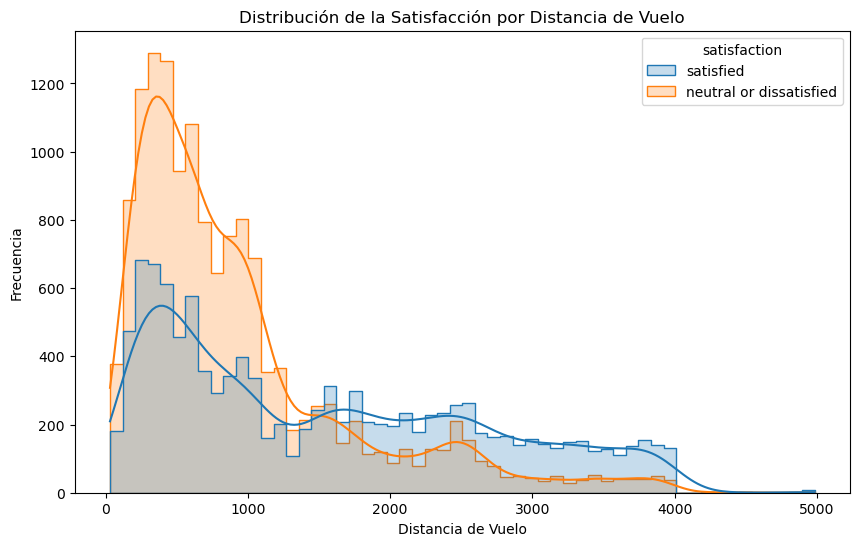

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Flight Distance', hue='satisfaction', kde=True, element="step")
plt.title('Distribución de la Satisfacción por Distancia de Vuelo')
plt.xlabel('Distancia de Vuelo')
plt.ylabel('Frecuencia')
plt.show()


### En la siguiente tabla se comprueba que los vuelos cortos son mas insatisfactorios que los vuelos largos, mientras mas largo el vuelo, mayor la satisfaccion

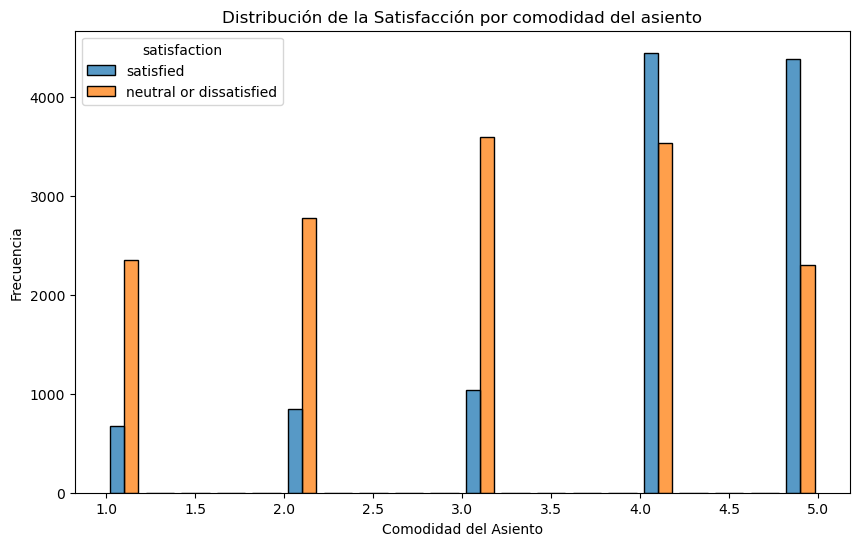

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Seat comfort', hue='satisfaction', multiple="dodge", shrink=.8)
plt.title('Distribución de la Satisfacción por comodidad del asiento')
plt.xlabel('Comodidad del Asiento')
plt.ylabel('Frecuencia')
plt.show()


### El grafico muestra la conformidad contra la calidad de los asientos, se puede apreciar que la brecha que existe entre la confomidad y la calidad de los asientos se va cerrando mientras la comodidad sube de calidad, esta superando la brecha hasta que los usuarios estan mas conformes que inconformes al momento que los asientos poseen una calidad de 4 estrellas

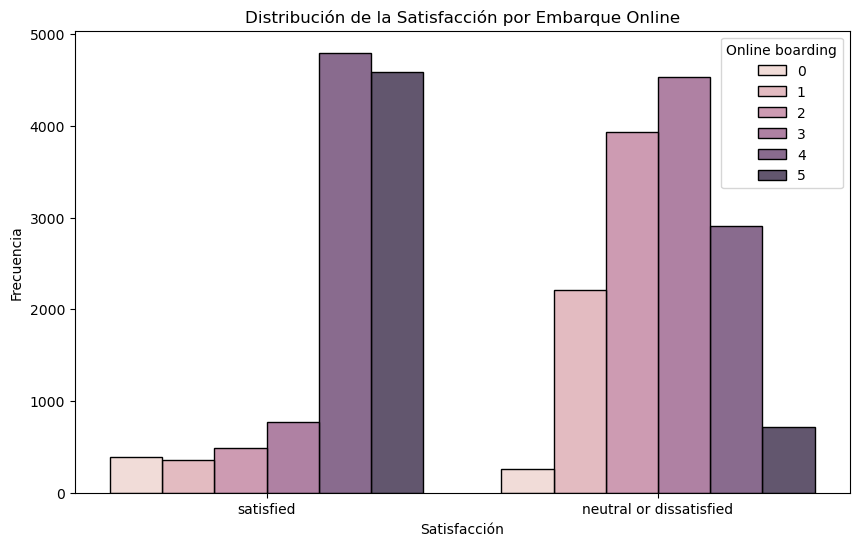

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='satisfaction', hue='Online boarding', multiple="dodge", shrink=.8)
plt.title('Distribución de la Satisfacción por Embarque Online')
plt.xlabel('Satisfacción')
plt.ylabel('Frecuencia')
plt.show()


### Se comrueba que al realizar la labor de embarque de manera online, mientras mayor es la calidad del servicio en linea aumenta la satisfaccion

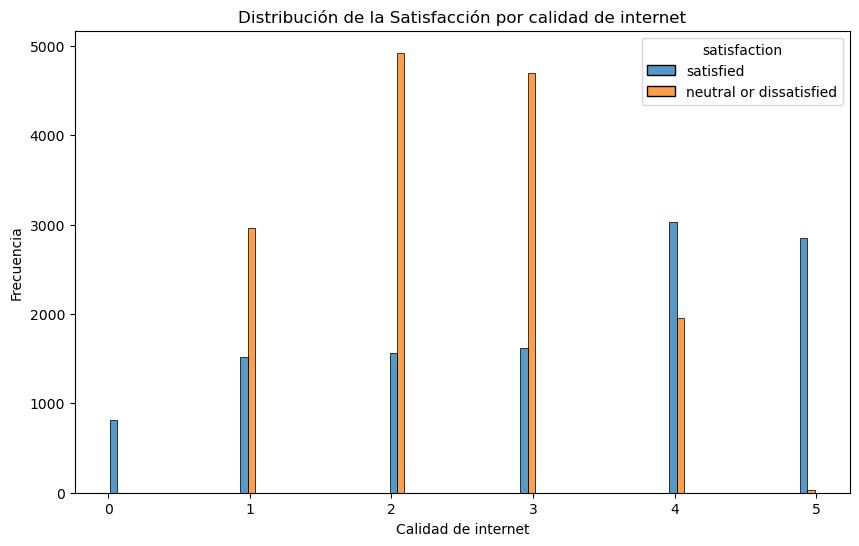

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_train, x='Inflight wifi service', hue='satisfaction', multiple="dodge", shrink=.8)
plt.title('Distribución de la Satisfacción por calidad de internet')
plt.xlabel('Calidad de internet')
plt.ylabel('Frecuencia')
plt.show()

### En el siguiente grafico se compara la calidad de internet contra la satisfaccion, donde se puede ver que los vuelos con sin internet y con internet de alta calidad casi no esiste inconformidad, mientras que si existe internet pero de mala calidad, se demuestra una alta inconformidad, cuando alcanza una calidad de 4 estrellas se logra ver que la brecha disminuye entre la conformidad e inconformidad

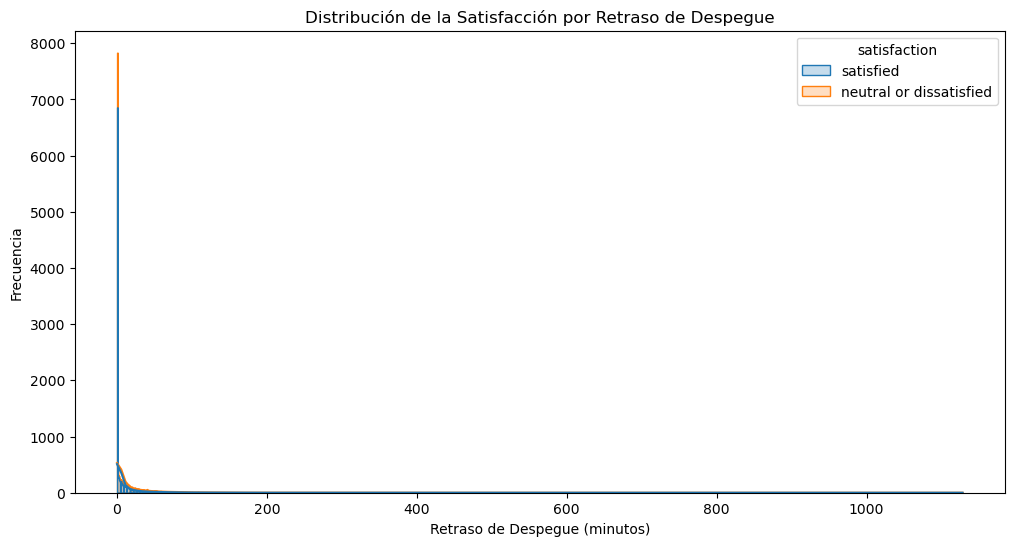

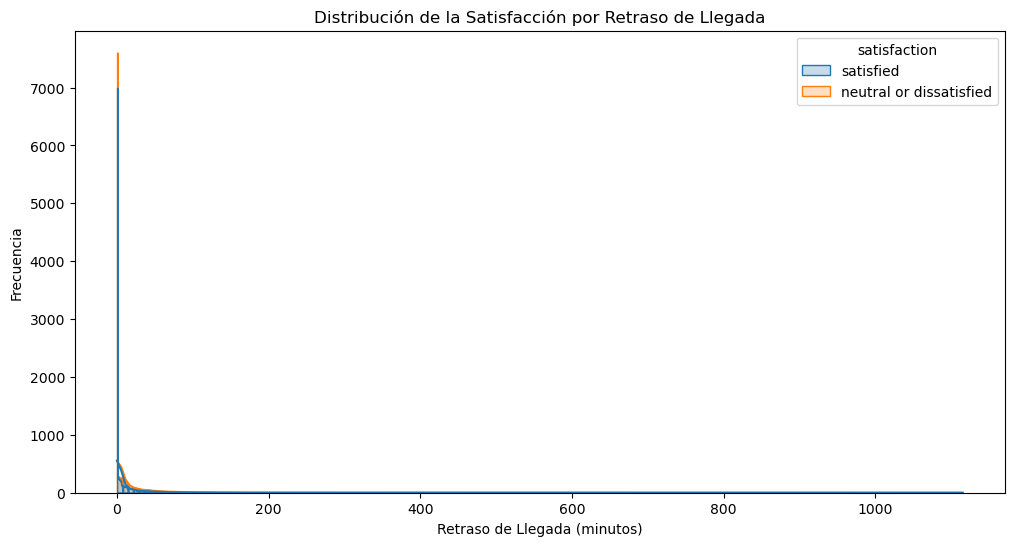

In [50]:
# prompt: genera un histograma que compare satisfaccion con el retraso de despege y el retraso de aterrizaje

import matplotlib.pyplot as plt
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=data_train, x='Departure Delay in Minutes', hue='satisfaction', kde=True, element="step")
plt.title('Distribución de la Satisfacción por Retraso de Despegue')
plt.xlabel('Retraso de Despegue (minutos)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data_train, x='Arrival Delay in Minutes', hue='satisfaction', kde=True, element="step")
plt.title('Distribución de la Satisfacción por Retraso de Llegada')
plt.xlabel('Retraso de Llegada (minutos)')
plt.ylabel('Frecuencia')
plt.show()


# Se comenzara a tratar los datos de los dataframes, empezando con el dataframe con los datos de entrenamiento

In [52]:
data_train.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [54]:
data_train = data_train.dropna()

# Verificar la cantidad de valores nulos después de la eliminación
print(data_train.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [57]:
display(data_train)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [59]:
print(data_train['satisfaction'].unique())

print(data_train['Class'].unique())

print(data_train['Customer Type'].unique())

print(data_train['Type of Travel'].unique())

print(data_train['Gender'].unique())

['satisfied' 'neutral or dissatisfied']
['Eco' 'Business' 'Eco Plus']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Female' 'Male']


EN el siguiente encodeo para la posterior analisis y aplicacion de modelos se dejaron las variables categoricas de la siguiente manera

satisfaction = 1 = satisfaied
               0 = nuetral satisfaied

In [62]:
# Asegúrate de trabajar con una copia para evitar el SettingWithCopyWarning
data_train = data_train.copy()

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Columnas a codificar
columns_to_encode = ['satisfaction', 'Customer Type', 'Type of Travel', 'Gender']

# Aplicar encoding a cada columna y guardar con nuevo nombre
for col in columns_to_encode:
    data_train.loc[:, col + '_encoded'] = label_encoder.fit_transform(data_train[col])

# Eliminar la columna original 'satisfaction'
data_train = data_train.drop(columns=['satisfaction','Type of Travel','Customer Type','Gender'])

# Mostrar el DataFrame actualizado
display(data_train)


,Unnamed: 0,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded
0,0,19556,52,Eco,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0,0,0
1,1,90035,36,Business,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,0,0,0
2,2,12360,20,Eco,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,1,0,1
3,3,77959,44,Business,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,0,0,1
4,4,36875,49,Eco,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,Business,526,3,3,3,1,4,...,4,4,5,4,0,0.0,0,1,0,1
25972,25972,71167,23,Business,646,4,4,4,4,4,...,5,5,5,4,0,0.0,1,0,0,1
25973,25973,37675,17,Eco,828,2,5,1,5,2,...,4,5,4,2,0,0.0,0,0,1,0
25974,25974,90086,14,Business,1127,3,3,3,3,4,...,5,4,5,4,0,0.0,1,0,0,1


Se realizo un encoding con ohe ya que esta variable posee 3 posibles estados no ordenados

In [65]:
data_train = data_train.copy()

# Inicializar el OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Ajustar y transformar la columna 'Class'
enc_df = pd.DataFrame(enc.fit_transform(data_train[['Class']]).toarray())

# Obtener los nombres de las clases originales
class_names = enc.categories_[0]

# Renombrar las columnas del OneHotEncoder con nombres más descriptivos
enc_df = enc_df.rename(columns={
    0: f'Class_{class_names[0]}',
    1: f'Class_{class_names[1]}',
    2: f'Class_{class_names[2]}'
})

# Concatenar el DataFrame codificado con el original
data_train = data_train.join(enc_df)

# Eliminar la columna original 'Class'
data_train = data_train.drop('Class', axis=1)

# Mostrar el DataFrame actualizado
display(data_train)


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded,Class_Business,Class_Eco,Class_Eco Plus
0,0,19556,52,160,5,4,3,4,3,4,...,5,50,44.0,1,0,0,0,0.0,1.0,0.0
1,1,90035,36,2863,1,1,3,1,5,4,...,5,0,0.0,1,0,0,0,1.0,0.0,0.0
2,2,12360,20,192,2,0,2,4,2,2,...,2,0,0.0,0,1,0,1,0.0,1.0,0.0
3,3,77959,44,3377,0,0,0,2,3,4,...,4,0,6.0,1,0,0,1,1.0,0.0,0.0
4,4,36875,49,1182,2,3,4,3,4,1,...,4,0,20.0,1,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,526,3,3,3,1,4,3,...,4,0,0.0,0,1,0,1,NaN,NaN,NaN
25972,25972,71167,23,646,4,4,4,4,4,4,...,4,0,0.0,1,0,0,1,NaN,NaN,NaN
25973,25973,37675,17,828,2,5,1,5,2,1,...,2,0,0.0,0,0,1,0,NaN,NaN,NaN
25974,25974,90086,14,1127,3,3,3,3,4,4,...,4,0,0.0,1,0,0,1,NaN,NaN,NaN


In [67]:
# prompt: muestrame todas las columnas que no contengan datos numericos

import numpy as np
# Assuming data_train DataFrame is already defined as in the provided code.

# Select only non-numeric columns
non_numeric_cols = data_train.select_dtypes(exclude=np.number).columns

# Display the non-numeric columns
non_numeric_cols


Index([], dtype='object')

In [69]:
# prompt: elimina las columnas id, Gate location

# Assuming data_train DataFrame is already defined as in the provided code.

# Drop the specified columns
data_train = data_train.drop(columns=['id', 'Gate location', 'Unnamed: 0'])

# Display the updated DataFrame
display(data_train)


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,3,4,3,5,5,...,5,50,44.0,1,0,0,0,0.0,1.0,0.0
1,36,2863,1,1,3,5,4,5,4,4,...,5,0,0.0,1,0,0,0,1.0,0.0,0.0
2,20,192,2,0,2,2,2,2,2,4,...,2,0,0.0,0,1,0,1,0.0,1.0,0.0
3,44,3377,0,0,0,3,4,4,1,1,...,4,0,6.0,1,0,0,1,1.0,0.0,0.0
4,49,1182,2,3,4,4,1,2,2,2,...,4,0,20.0,1,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,4,3,4,4,3,...,4,0,0.0,0,1,0,1,NaN,NaN,NaN
25972,23,646,4,4,4,4,4,4,4,4,...,4,0,0.0,1,0,0,1,NaN,NaN,NaN
25973,17,828,2,5,1,2,1,2,2,4,...,2,0,0.0,0,0,1,0,NaN,NaN,NaN
25974,14,1127,3,3,3,4,4,4,4,3,...,4,0,0.0,1,0,0,1,NaN,NaN,NaN


In [71]:
nan_counts = data_train.isnull().sum()

columns_with_nan = nan_counts[nan_counts > 0]

print("Columns with NaN values:")
columns_with_nan


Columns with NaN values:


Class_Business    83
Class_Eco         83
Class_Eco Plus    83
dtype: int64

In [73]:
data_train = data_train.dropna()

print(data_train.isnull().sum())

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction_encoded                 0
Customer Type_encoded                0
Type of Travel_encoded               0
Gender_encoded                       0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64


In [75]:
num_rows, num_cols = data_train.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

data_train.info()

Number of rows: 25810
Number of columns: 24
<class 'pandas.core.frame.DataFrame'>
Index: 25810 entries, 0 to 25892
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                25810 non-null  int64  
 1   Flight Distance                    25810 non-null  int64  
 2   Inflight wifi service              25810 non-null  int64  
 3   Departure/Arrival time convenient  25810 non-null  int64  
 4   Ease of Online booking             25810 non-null  int64  
 5   Food and drink                     25810 non-null  int64  
 6   Online boarding                    25810 non-null  int64  
 7   Seat comfort                       25810 non-null  int64  
 8   Inflight entertainment             25810 non-null  int64  
 9   On-board service                   25810 non-null  int64  
 10  Leg room service                   25810 non-null  int64  
 11  Baggage handlin

# Se procedera a realizar la misma limpieza de datos con el dataframe de prueba


In [78]:
data_test.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [80]:
data_test = data_test.dropna()

In [82]:
# Asegúrate de trabajar con una copia para evitar el SettingWithCopyWarning
data_test = data_test.copy()

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Columnas a codificar
columns_to_encode = ['satisfaction', 'Customer Type', 'Type of Travel', 'Gender']

# Aplicar encoding a cada columna y guardar con nuevo nombre
for col in columns_to_encode:
    data_test.loc[:, col + '_encoded'] = label_encoder.fit_transform(data_test[col])

# Eliminar la columna original 'satisfaction'
data_test = data_test.drop(columns=['satisfaction','Type of Travel','Customer Type','Gender'])

# Mostrar el DataFrame actualizado
display(data_test)

,Unnamed: 0,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded
0,0,70172,13,Eco Plus,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0,1,1
1,1,5047,25,Business,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1,0,1
2,2,110028,26,Business,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,0,0,0
3,3,24026,25,Business,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,0,0,0
4,4,119299,61,Business,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,Eco,192,2,1,2,3,2,...,4,2,3,2,3,0.0,0,1,0,0
103900,103900,73097,49,Business,2347,4,4,4,4,2,...,5,5,5,4,0,0.0,1,0,0,1
103901,103901,68825,30,Business,1995,1,1,1,3,4,...,4,5,5,4,7,14.0,0,1,0,1
103902,103902,54173,22,Eco,1000,1,1,1,5,1,...,1,5,4,1,0,0.0,0,1,0,0


In [84]:
data_test = data_test.copy()

# Inicializar el OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# Ajustar y transformar la columna 'Class'
enc_df = pd.DataFrame(enc.fit_transform(data_test[['Class']]).toarray())

# Obtener los nombres de las clases originales
class_names = enc.categories_[0]

# Renombrar las columnas del OneHotEncoder con nombres más descriptivos
enc_df = enc_df.rename(columns={
    0: f'Class_{class_names[0]}',
    1: f'Class_{class_names[1]}',
    2: f'Class_{class_names[2]}'
})

# Concatenar el DataFrame codificado con el original
data_test = data_test.join(enc_df)

# Eliminar la columna original 'Class'
data_test = data_test.drop('Class', axis=1)

# Mostrar el DataFrame actualizado
display(data_test)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded,Class_Business,Class_Eco,Class_Eco Plus
0,0,70172,13,460,3,4,3,1,5,3,...,5,25,18.0,0,0,1,1,0.0,0.0,1.0
1,1,5047,25,235,3,2,3,3,1,3,...,1,1,6.0,0,1,0,1,1.0,0.0,0.0
2,2,110028,26,1142,2,2,2,2,5,5,...,5,0,0.0,1,0,0,0,1.0,0.0,0.0
3,3,24026,25,562,2,5,5,5,2,2,...,2,11,9.0,0,0,0,0,1.0,0.0,0.0
4,4,119299,61,214,3,3,3,3,4,5,...,3,0,0.0,1,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,2,3,0.0,0,1,0,0,NaN,NaN,NaN
103900,103900,73097,49,2347,4,4,4,4,2,4,...,4,0,0.0,1,0,0,1,NaN,NaN,NaN
103901,103901,68825,30,1995,1,1,1,3,4,1,...,4,7,14.0,0,1,0,1,NaN,NaN,NaN
103902,103902,54173,22,1000,1,1,1,5,1,1,...,1,0,0.0,0,1,0,0,NaN,NaN,NaN


In [86]:
data_test = data_test.drop(columns=['id', 'Gate location', 'Unnamed: 0'])

display(data_test)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded,Customer Type_encoded,Type of Travel_encoded,Gender_encoded,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,5,3,5,5,4,...,5,25,18.0,0,0,1,1,0.0,0.0,1.0
1,25,235,3,2,3,1,3,1,1,1,...,1,1,6.0,0,1,0,1,1.0,0.0,0.0
2,26,1142,2,2,2,5,5,5,5,4,...,5,0,0.0,1,0,0,0,1.0,0.0,0.0
3,25,562,2,5,5,2,2,2,2,2,...,2,11,9.0,0,0,0,0,1.0,0.0,0.0
4,61,214,3,3,3,4,5,5,3,3,...,3,0,0.0,1,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,2,2,2,2,3,...,2,3,0.0,0,1,0,0,NaN,NaN,NaN
103900,49,2347,4,4,4,2,4,5,5,5,...,4,0,0.0,1,0,0,1,NaN,NaN,NaN
103901,30,1995,1,1,1,4,1,5,4,3,...,4,7,14.0,0,1,0,1,NaN,NaN,NaN
103902,22,1000,1,1,1,1,1,1,1,4,...,1,0,0.0,0,1,0,0,NaN,NaN,NaN


In [88]:
nan_counts = data_test.isnull().sum()

columns_with_nan = nan_counts[nan_counts > 0]

print("Columns with NaN values:")
columns_with_nan

Columns with NaN values:


Class_Business    310
Class_Eco         310
Class_Eco Plus    310
dtype: int64

In [90]:
data_test = data_test.dropna()

print(data_test.isnull().sum())

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction_encoded                 0
Customer Type_encoded                0
Type of Travel_encoded               0
Gender_encoded                       0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64


In [92]:
num_rows, num_cols = data_test.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

data_test.info()

Number of rows: 103284
Number of columns: 24
<class 'pandas.core.frame.DataFrame'>
Index: 103284 entries, 0 to 103593
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103284 non-null  int64  
 1   Flight Distance                    103284 non-null  int64  
 2   Inflight wifi service              103284 non-null  int64  
 3   Departure/Arrival time convenient  103284 non-null  int64  
 4   Ease of Online booking             103284 non-null  int64  
 5   Food and drink                     103284 non-null  int64  
 6   Online boarding                    103284 non-null  int64  
 7   Seat comfort                       103284 non-null  int64  
 8   Inflight entertainment             103284 non-null  int64  
 9   On-board service                   103284 non-null  int64  
 10  Leg room service                   103284 non-null  int64  
 11 

# Se guardan los dataframe limpios

In [95]:
data_test.to_excel('data_test.xlsx', index=False)

In [96]:
data_train.to_excel('data_train.xlsx', index=False)

In [97]:
data_test.shape

(103284, 24)

In [98]:
data_train.shape

(25810, 24)

In [99]:
data = pd.concat([data_test, data_train], axis=0).reset_index(drop=True)
data.shape

(129094, 24)

In [100]:
data.to_excel('data.xlsx', index=False)

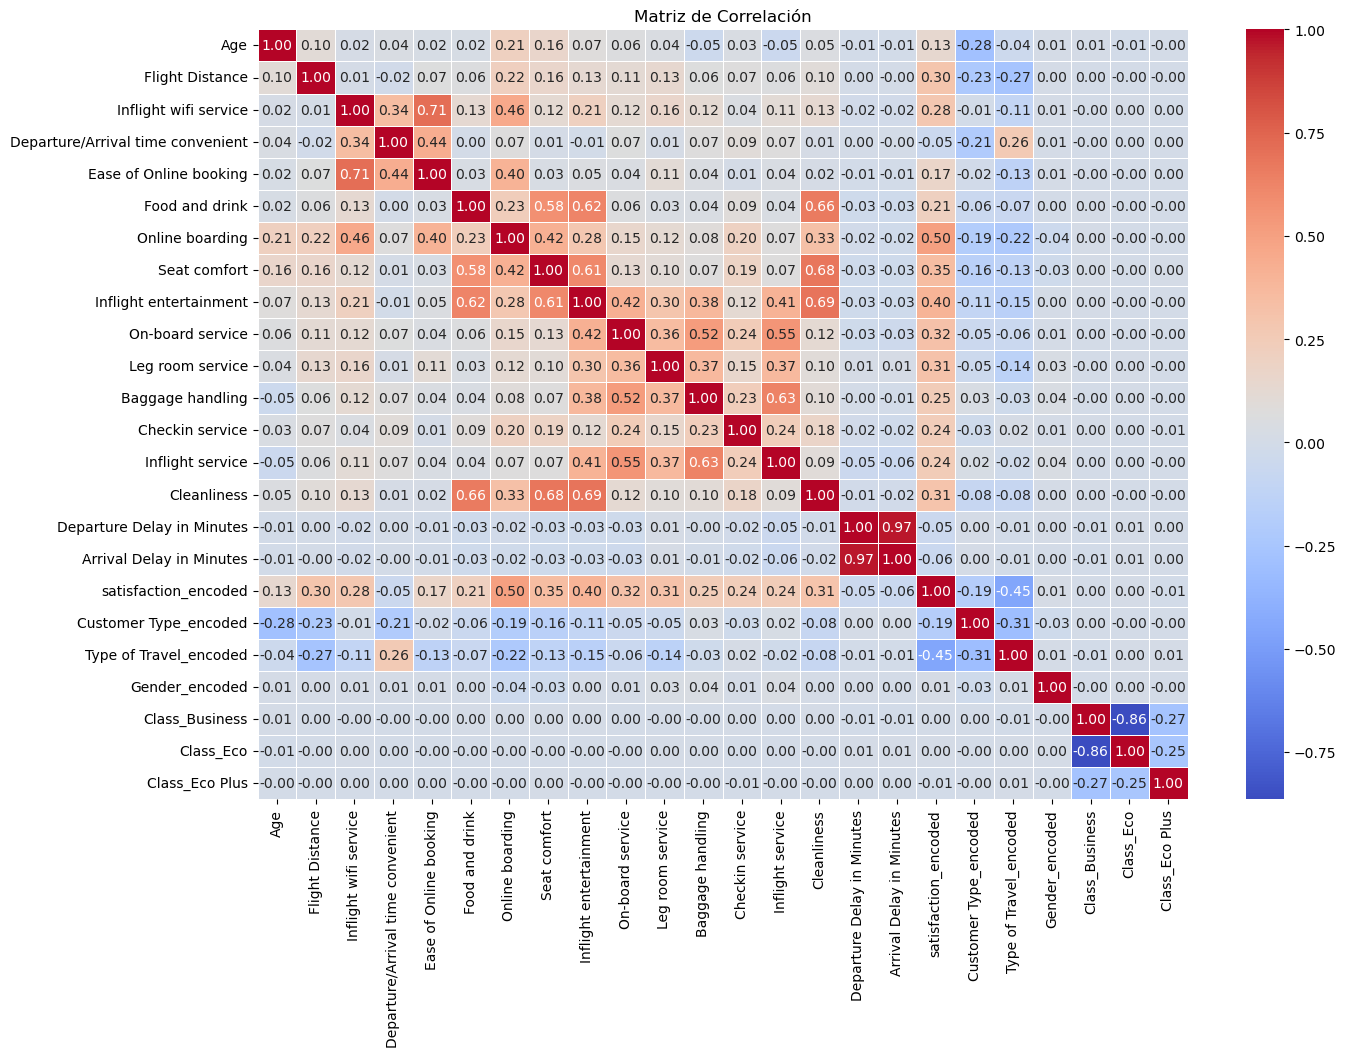

In [101]:
correlation_matrix = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(15, 10))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el heatmap
plt.title('Matriz de Correlación')
plt.show()
